Support Vector Machines

SVM stands for Support Vector Machine. It's a powerful supervised machine learning algorithm used for classification and regression tasks. The main principle behind SVM is to find the hyperplane that best separates different classes in the feature space.

CAP SHAPES

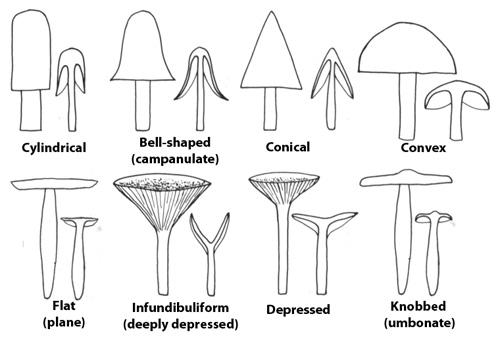

CAP SURFACES

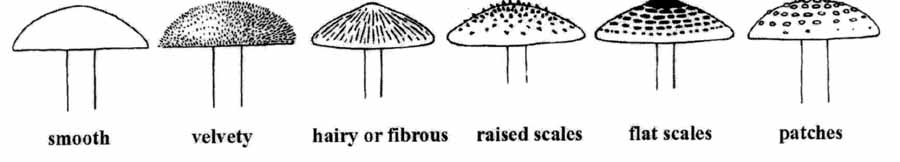


In [82]:
# SVM Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [83]:
df=pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [85]:
df.isnull().sum()


Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [86]:
df = df.drop(columns=['Unnamed: 0'])
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


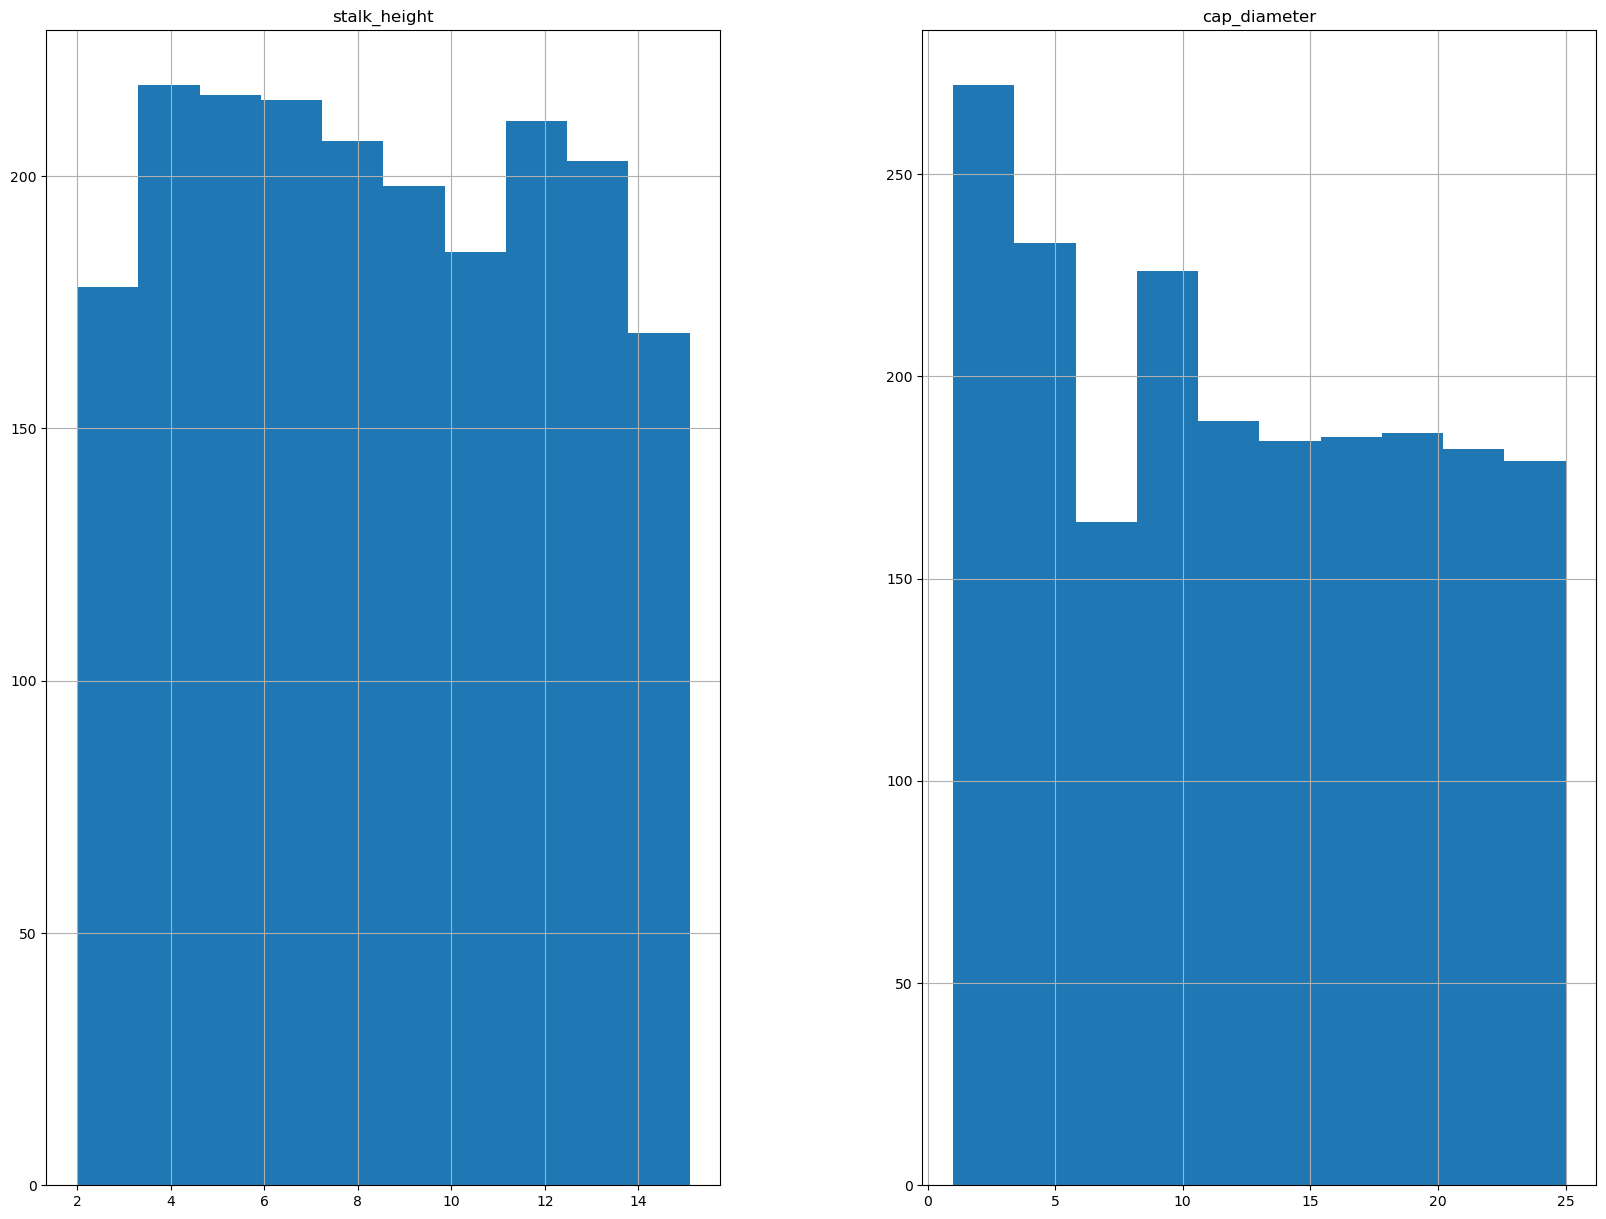

In [54]:
df.hist(figsize=(20, 15))
plt.show()

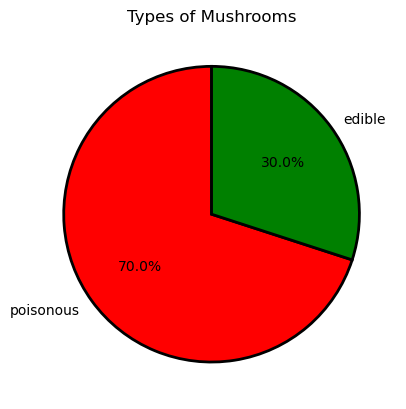

In [55]:
#plot a pie chart  based on types of mushrooms in class column with black bold outlines with edible as green and poisonous as red

types = df['class'].value_counts()
colors = ['green' if type_ == 'edible' else 'red' for type_ in types.index]
plt.pie(types, colors=colors, autopct='%1.1f%%', labels=types.index, startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 2})
plt.title('Types of Mushrooms')
plt.show()

the red part represents that the percentage of the poisonous mushrooms in the dataset. The green part represents that the percentage of edible mushrooms. The percentages of these classes are pretty distinct to each other.

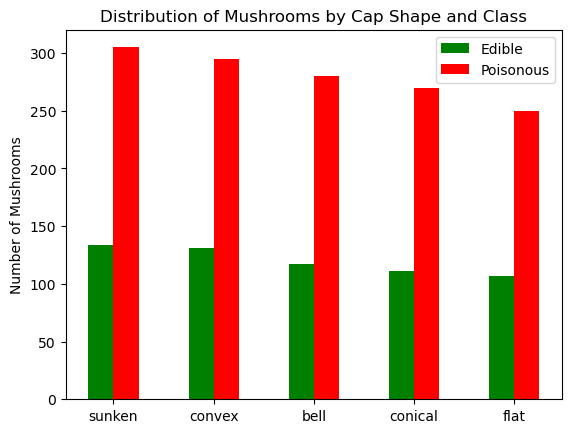

In [56]:
import matplotlib.pyplot as plt
import numpy as np
# Separate the data by class
edible_df = df[df['class'] == 'edible']
poisonous_df = df[df['class'] == 'poisonous']

# Count the number of mushrooms for each cap shape
edible_cap_shape_counts = edible_df['cap_shape'].value_counts()
poisonous_cap_shape_counts = poisonous_df['cap_shape'].value_counts()

# Create a list of cap shapes
cap_shapes = edible_cap_shape_counts.index.tolist()

# Create a list of bar positions
x_pos = np.arange(len(cap_shapes))

# Create a bar chart
fig, ax = plt.subplots()
width = 0.25

rects1 = ax.bar(x_pos - width/2, edible_cap_shape_counts, width, label='Edible', color='green')
rects2 = ax.bar(x_pos + width/2, poisonous_cap_shape_counts, width, label='Poisonous', color='red')

# Add labels and title
ax.set_ylabel('Number of Mushrooms')
ax.set_title('Distribution of Mushrooms by Cap Shape and Class')
ax.set_xticks(x_pos)
ax.set_xticklabels(cap_shapes)
ax.legend()

# Show the plot
plt.show()

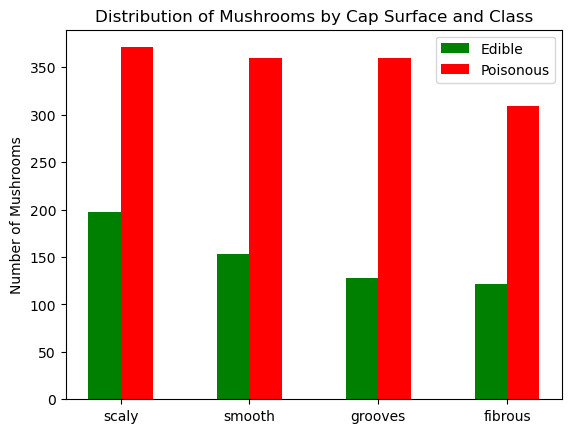

In [57]:
import matplotlib.pyplot as plt
import numpy as np
# Separate the data by class
edible_df = df[df['class'] == 'edible']
poisonous_df = df[df['class'] == 'poisonous']

# Count the number of mushrooms for each cap surface
edible_cap_surface_counts = edible_df['cap_surface'].value_counts()
poisonous_cap_surface_counts = poisonous_df['cap_surface'].value_counts()

# Create a list of cap surfaces
cap_surfaces = edible_cap_surface_counts.index.tolist()

# Create a list of bar positions
x_pos = np.arange(len(cap_surfaces))

# Create a bar chart
fig, ax = plt.subplots()
width = 0.25

rects1 = ax.bar(x_pos - width/2, edible_cap_surface_counts, width, label='Edible', color='green')
rects2 = ax.bar(x_pos + width/2, poisonous_cap_surface_counts, width, label='Poisonous', color='red')

# Add labels and title
ax.set_ylabel('Number of Mushrooms')
ax.set_title('Distribution of Mushrooms by Cap Surface and Class')
ax.set_xticks(x_pos)
ax.set_xticklabels(cap_surfaces)
ax.legend()

# Show the plot
plt.show()

** As seen from the figure, the Scaly and Smooth , groovy types are high poisonous. However, the scaly and smooth type is mostly edible.**

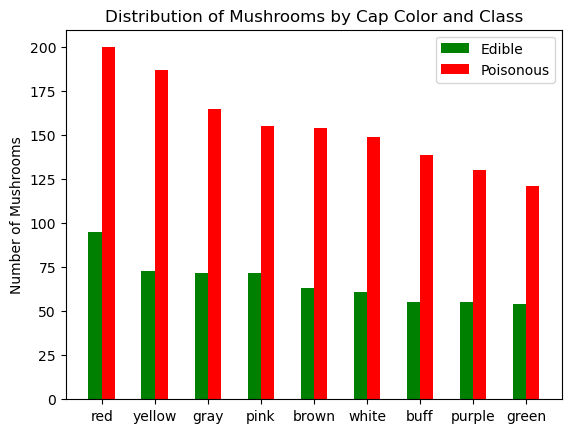

In [58]:
import matplotlib.pyplot as plt
import numpy as np
# Separate the data by class
edible_df = df[df['class'] == 'edible']
poisonous_df = df[df['class'] == 'poisonous']

# Count the number of mushrooms for each cap color
edible_cap_color_counts = edible_df['cap_color'].value_counts()
poisonous_cap_color_counts = poisonous_df['cap_color'].value_counts()

# Create a list of cap colors
cap_colors = edible_cap_color_counts.index.tolist()

# Create a list of bar positions
x_pos = np.arange(len(cap_colors))

# Create a bar chart
fig, ax = plt.subplots()
width = 0.25

rects1 = ax.bar(x_pos - width/2, edible_cap_color_counts, width, label='Edible', color='green')
rects2 = ax.bar(x_pos + width/2, poisonous_cap_color_counts, width, label='Poisonous', color='red')

# Add labels and title
ax.set_ylabel('Number of Mushrooms')
ax.set_title('Distribution of Mushrooms by Cap Color and Class')
ax.set_xticks(x_pos)
ax.set_xticklabels(cap_colors)
ax.legend()

# Show the plot
plt.show()

From above chart, Red, yellow, gray , pink , brown are top 5 mushroom colours with most of them being edible and poisonous.

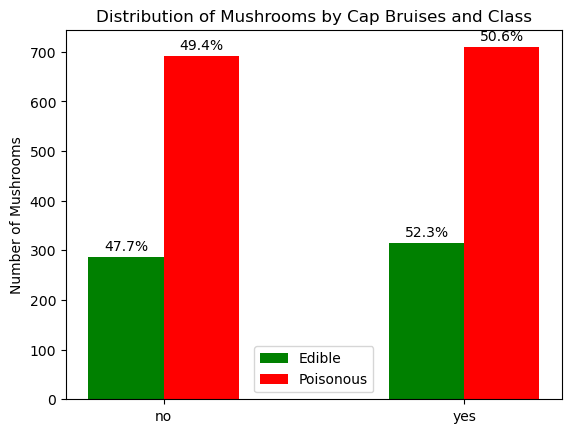

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('mushroom.csv')

# Group the data by cap bruises and class
grouped_data = df.groupby(['bruises', 'class']).size().unstack()

# Create a bar chart
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.25

# Get the positions for the bars
x_pos = np.arange(len(grouped_data.index))

# Plot the bars
rects1 = ax.bar(x_pos - bar_width/2, grouped_data['edible'], bar_width, label='Edible', color='green')
rects2 = ax.bar(x_pos + bar_width/2, grouped_data['poisonous'], bar_width, label='Poisonous', color='red')

# Add labels and title
ax.set_ylabel('Number of Mushrooms')
ax.set_title('Distribution of Mushrooms by Cap Bruises and Class')
ax.set_xticks(x_pos)
ax.set_xticklabels(grouped_data.index)
ax.legend()

# Add percentages to the bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}%'.format(round(height / grouped_data['edible'].sum() * 100, 1)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}%'.format(round(height / grouped_data['poisonous'].sum() * 100, 1)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()


From above chart , we can say that mushrooms with bruises are comparitevly more poisonous and less edible than mushrooms with no bruises.

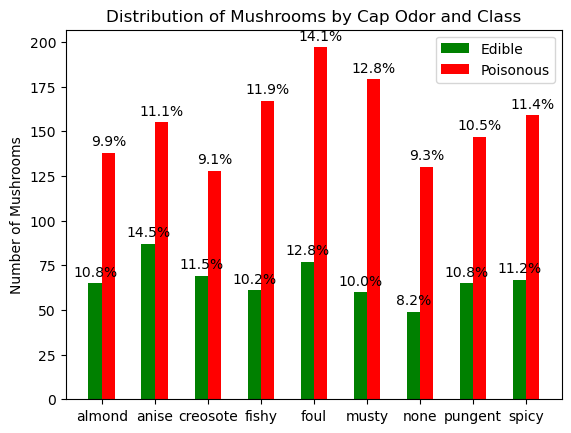

In [60]:
# Group the data by cap odor and class
grouped_data = df.groupby(['odor', 'class']).size().unstack()

# Create a bar chart
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.25

# Get the positions for the bars
x_pos = np.arange(len(grouped_data.index))

# Plot the bars
rects1 = ax.bar(x_pos - bar_width/2, grouped_data['edible'], bar_width, label='Edible', color='green')
rects2 = ax.bar(x_pos + bar_width/2, grouped_data['poisonous'], bar_width, label='Poisonous', color='red')

# Add labels and title
ax.set_ylabel('Number of Mushrooms')
ax.set_title('Distribution of Mushrooms by Cap Odor and Class')
ax.set_xticks(x_pos)
ax.set_xticklabels(grouped_data.index)
ax.legend()

# Add percentages to the bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}%'.format(round(height / grouped_data['edible'].sum() * 100, 1)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{}%'.format(round(height / grouped_data['poisonous'].sum() * 100, 1)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.show()

Mushrooms which release foul , musty, spicy and fishy are most poisonous , however mushrooms with anise , creosote, foul are mostly edible.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Populations')

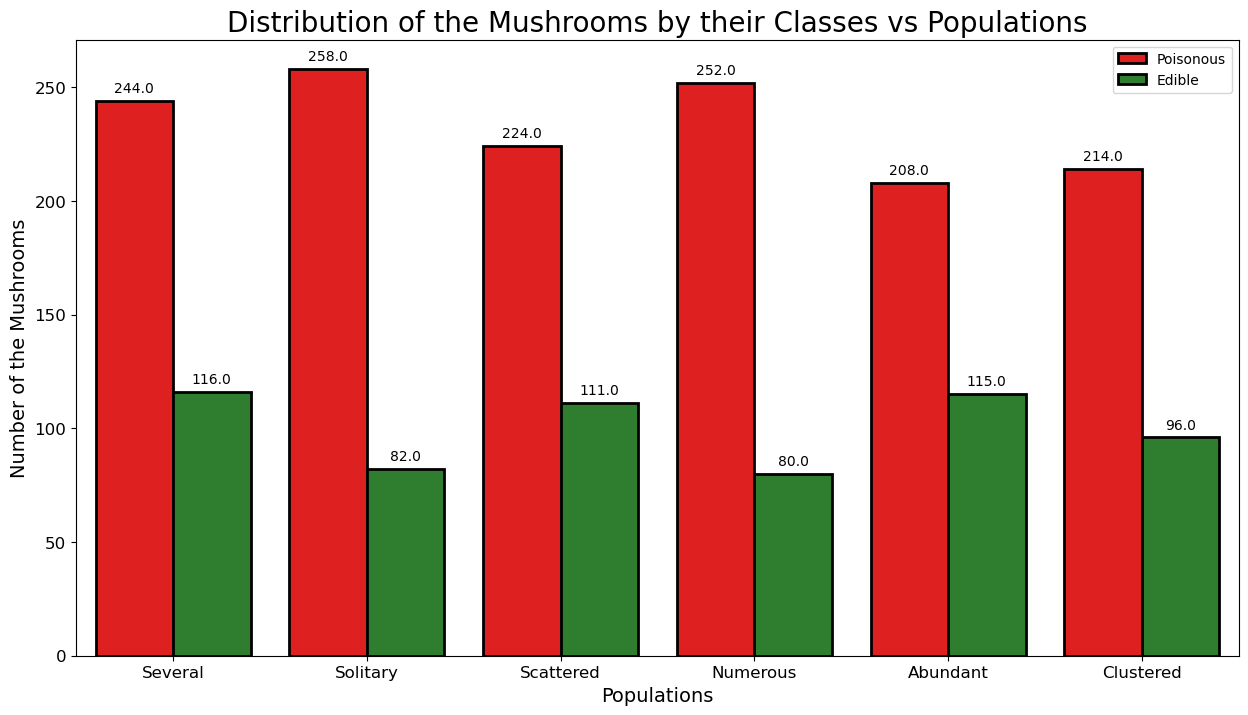

In [61]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='population',
                      hue='class',
                      order=df['population'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Populations', fontsize=20)

According to the graph above, the mushrooms populated as Several types are highly poisonous. In contrast, the mushrooms with Several, Abundant, and Scattered populations are pretty edible.

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Habitats')

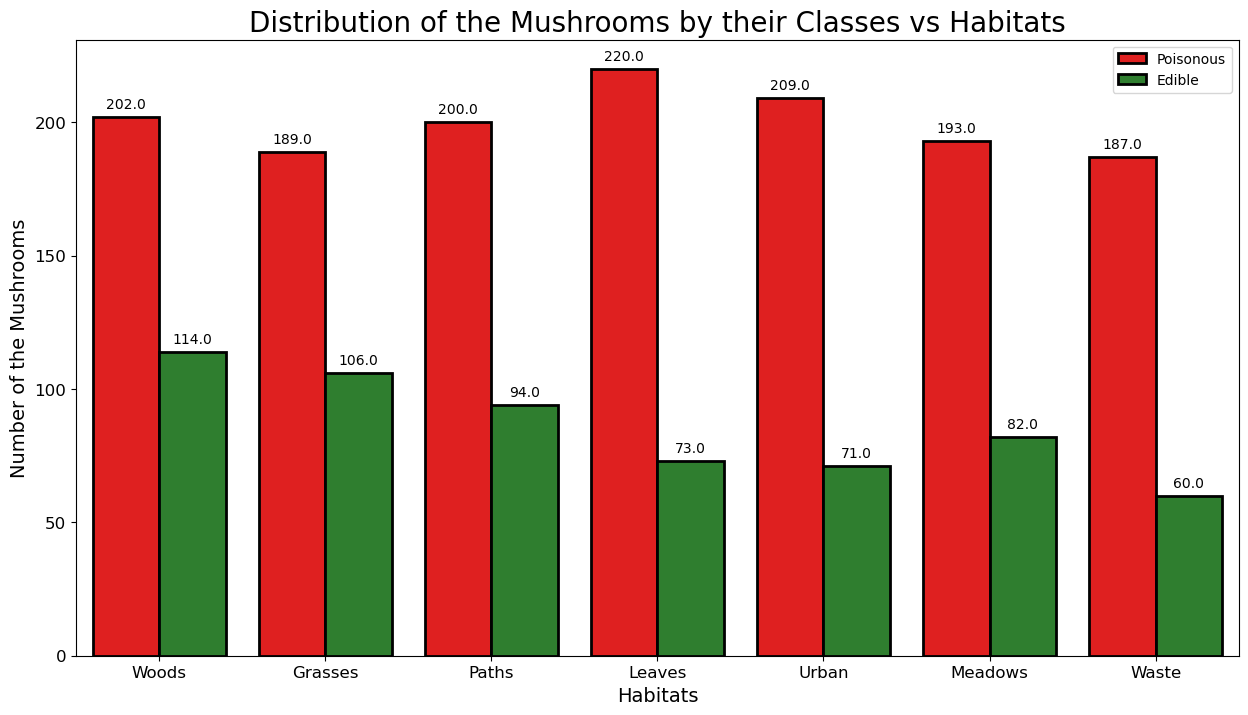

In [62]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='habitat',
                      hue='class',
                      order=df['habitat'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Habitats', fontsize=20)

From above chart, Mushrooms growing in habitats such as leaves , urban, woods have high poisonous, whereas mushroom habitats such as woods, grasses, paths have high edibility.



There no missing data points, so need to impute and pre-process the data.

In [88]:
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
for column in df.columns:
     if df[column].dtype == 'object':
         df[column] = label_encoder.fit_transform(df[column])
df


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,11.092703,8.423199


In [65]:
# df2=pd.get_dummies(df)
# df2

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,False,False,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1996,6.500840,13.501957,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
1997,13.558064,11.270020,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1998,11.092703,8.423199,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


In [89]:
print("\nAfter One- Hot  Encoding:")
print(df.head())


After One- Hot  Encoding:
   cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0             2          0           7            1  ...          0   
1             1          1           3            0  ...          1   
2             1          0           8            1  ...          1   
3             0          0           6            0  ...          0   
4             1          1           6            0  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2      

Split the DataFrame into 
𝑋
X and 
where 
𝑋
X contains the first 22 columns and 
𝑌
Y contains the last 3 columns.

In [92]:
df.dtypes

cap_shape                     int32
cap_surface                   int32
cap_color                     int32
bruises                       int32
odor                          int32
gill_attachment               int32
gill_spacing                  int32
gill_size                     int32
gill_color                    int32
stalk_shape                   int32
stalk_root                    int32
stalk_surface_above_ring      int32
stalk_surface_below_ring      int32
stalk_color_above_ring        int32
stalk_color_below_ring        int32
veil_type                     int32
veil_color                    int32
ring_number                   int32
ring_type                     int32
spore_print_color             int32
population                    int32
habitat                       int32
class                         int64
stalk_height                float64
cap_diameter                float64
dtype: object

In [99]:
Y = df['class'] # The label for the machine learning models
X = df.drop(['class'],axis=1)  # features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [100]:
X_train

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
836,2,2,0,0,5,0,0,1,10,0,...,2,1,3,0,5,7,4,4,2.078784,16.765547
575,0,3,6,0,0,1,2,0,9,1,...,4,1,3,2,0,0,2,3,6.494950,6.142622
557,0,1,4,1,3,2,1,1,4,0,...,4,0,3,2,2,1,1,3,6.483619,2.766475
1235,0,2,4,1,7,0,1,0,2,1,...,1,1,3,1,1,4,0,0,14.295124,13.598769
1360,4,1,5,0,0,2,2,0,9,1,...,5,1,3,2,1,1,1,0,5.082636,6.235132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,4,2,8,0,1,3,0,0,8,1,...,4,0,0,0,6,2,3,6,10.973666,13.435538
1294,1,1,6,1,4,3,2,1,8,0,...,8,0,0,0,5,2,3,0,2.570015,8.892683
860,3,3,0,0,4,0,2,0,6,0,...,4,0,3,2,0,3,4,5,3.628180,9.636546
1459,4,1,8,0,1,1,1,0,4,0,...,7,0,2,0,5,6,4,5,6.156392,22.060143


In [101]:
 Y_train

836     0
575     1
557     1
1235    1
1360    1
       ..
1130    0
1294    1
860     1
1459    1
1126    0
Name: class, Length: 1400, dtype: int64

In [102]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (1400, 24)
X_test shape: (600, 24)
Y_train shape: (1400,)
Y_test shape: (600,)


In [103]:
clf = SVC()
clf.fit(X_train,Y_train)

SVC()

In [105]:
Y_predict = clf.predict(X_test)
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [107]:
accuracy_score(Y_test,Y_predict)

0.6916666666666667

In [108]:
accuracy_score(Y_train, clf.predict(X_train))

0.7035714285714286

### Grid Search CV

In [110]:
confusion_matrix(Y_test,Y_predict)

array([[  0, 185],
       [  0, 415]], dtype=int64)

In [111]:
clf = SVC()
#param_grid = [{'kernel':['linear','rbf','poly'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.01] }]
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.1,0.5,1],'C':[0.01,0.1,1] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=6,)
gsv.fit(X_test,Y_test)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [0.01, 0.1, 1],
                                         'gamma': [0.1, 0.5, 1],
                                         'kernel': ['linear', 'rbf']}])

In [112]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'rbf', 'gamma': 0.5, 'C': 1}, 0.7599999999999999)

In [114]:
clf_model = SVC(kernel='linear',C=1)
clf_model.fit(X_train , Y_train)
y_pred = clf_model.predict(X_test)
acc = accuracy_score(Y_test, Y_predict) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_predict)

Accuracy = 69.16666666666667


array([[  0, 185],
       [  0, 415]], dtype=int64)

In [115]:
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [116]:
confusion_matrix(Y_test,Y_predict)

array([[  0, 185],
       [  0, 415]], dtype=int64)

In [119]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600



C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


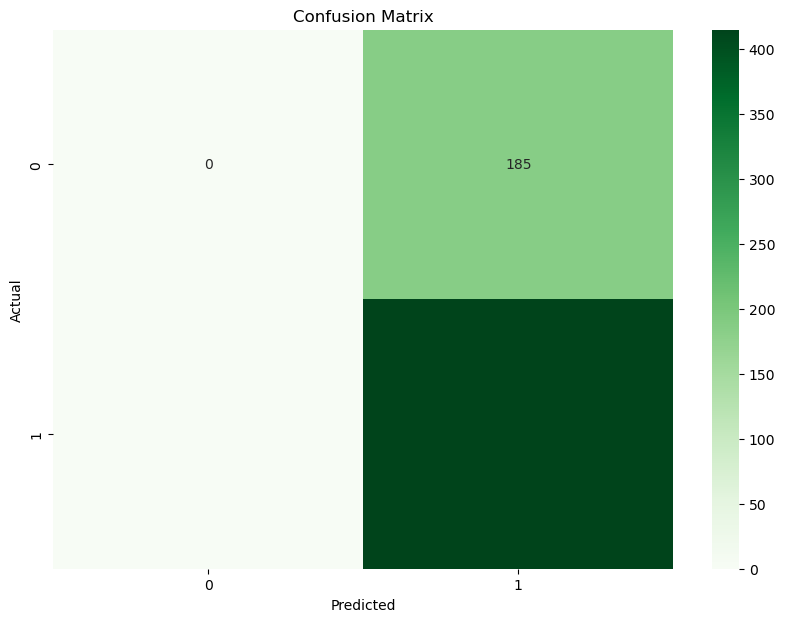

In [124]:
cm = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Strengths of SVM:

Effective in High-Dimensional Spaces:

SVM works well when the number of features (attributes) is large, which is beneficial for the Mushroom dataset with many categorical features.
Robust to Overfitting:

By using the regularization parameter C, SVM can prevent overfitting even with complex datasets. This means it can generalize well to new, unseen data.
Good with Clear Margins:

SVMs are particularly powerful when there is a clear margin of separation between classes (edible vs. poisonous mushrooms). If the classes are well-separated, SVMs perform exceptionally well.
Weaknesses of SVM:
Computationally Intensive:

SVMs can be slow to train, especially with large datasets, because of their complexity in finding the optimal hyperplane.
Sensitive to Parameter Settings:

The performance of SVM heavily depends on the choice of kernel, regularization parameter C, and kernel parameters like gamma. Tuning these parameters can be time-consuming.
Poor Performance on Overlapping Classes:

If the classes (edible and poisonous mushrooms) are not well-separated and overlap significantly, SVM might not perform well because it seeks to find the best margin between classes.

Positive Implications:

High Accuracy:

SVM often provides high accuracy in classification tasks, making it suitable for applications where precision is crucial, such as medical diagnoses or fraud detection.
Effective for Text Classification:

SVMs are widely used in text classification tasks like spam detection, sentiment analysis, and document categorization due to their ability to handle high-dimensional data efficiently.
Versatile:

With the right kernel, SVMs can model complex relationships in the data. This versatility allows them to be used in a variety of fields, from bioinformatics to finance.
Negative Implications:
Training Time:

The training time can be significant for large datasets, which might be impractical for real-time applications or situations where quick model updates are necessary.
Resource-Intensive:

SVMs require substantial memory and computational resources, especially with large datasets and non-linear kernels, which might be a limitation in resource-constrained environments.
Complexity in Tuning:

Finding the optimal parameters requires extensive cross-validation and grid search, which can be computationally expensive and time-consuming. This complexity can be a barrier for rapid development and deployment.